<h1 style="text-align:center"> Exploring and Predicting Characteristics of Japanese Newspaper Headlines </h1> 
<h2 style="text-align:center"> <i>STA208 Final Project (Spring 2017)</i> </h2> 
<h3 style="text-align:center"> <i>Tzu-ping Liu and Gento Kato</i> </h3> 


[<h5 style="text-align:center"> Back to Summary Notebook </h5>](STA208_Project_Summary.ipynb)

<h1 style="text-align:center"> Section IV </h1>
<h1 style="text-align:center"> <i>Exploring Categories of Newspaper Headlines</i> </h1>

In [69]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 1. Preparation

**Import Packages and Original Data**

In [1]:
# Computation Timer
from timeit import default_timer as trec

# Data Mining
import pandas as pd
import numpy as np
from sklearn import decomposition
from scipy.spatial.distance import cdist, pdist
from scipy import sparse as sp ## Sparse Matrix
from sklearn.cluster import KMeans, MiniBatchKMeans # Add MiniBatchKMeans

# Visualization
from IPython.display import display # Display HTML Table
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
start = trec()

## Import Data
alldata = pd.read_csv("../data/alldata_traincode_170510.csv", encoding='CP932')
allWrdMat10 = pd.read_csv("../data/allWrdMat10.csv.gz", encoding='CP932')

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 288.636 seconds


## 2. K-Means to Explore Topical Categories in Headlines

### 2.1 Application to Full Dataset

**Create Sparse Matrix**

In [3]:
start = trec() 

## Set X as CSR Sparse Matrix (Row Extraction is Faster) 
X = np.array(allWrdMat10)
X = sp.csr_matrix(X)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 40.549 seconds


**Conduct K-Means**

In [4]:
start = trec() 

## K Means from Whole Data
## Using the elbow nethod to determine the number of clusters
cluster = range(1, 16)
score = []
for a in cluster:
    kmeans = KMeans(n_clusters=a, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
    ks = -(kmeans.fit(X).score(X))
    score.append(ks)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 6082.276 seconds


Since we intentionally to let the machine decide how many clusters, we utilize the scree plot, which is constructed based on the score and the number of clusters, to see the poential number of clusters we should consider.

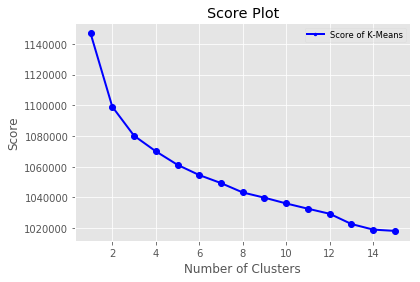

In [5]:
## Plotting the result
plt.plot(cluster, score, 'bo-', linewidth=2)
plt.title('Score Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
leg = plt.legend(['Score of K-Means'], loc='best', borderpad=0.3,
                 shadow=False, prop=mpl.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

According to the scree plot, it shows that the "**elbow**" point is **3**. However, to prevent the biasness, in addtition to **three** clusters, we also let the machine learn the cases of **four** clusters and **five** clusters. The results are shown below.

In [6]:
start = trec() 

kmeans3 = KMeans(n_clusters=3, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult3 = kmeans3.fit(X)
kmlabels3 = kmresult3.predict(X)
words = allWrdMat10.columns

print("Top 20 terms per cluster:")
order_centroids3 = kmresult3.cluster_centers_.argsort()[:, ::-1]

for a in range(3):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids3[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult3.cluster_centers_[a,b])
    comptable = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable = comptable.transpose()
    display(comptable)
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Top 20 terms per cluster:
Cluster 0:


,０,１,２,円,５,３,人,万,億,４,年,６,８,７,９,日,％,年度,兆,社
20 highest component,2.549,0.649,0.545,0.432,0.298,0.289,0.278,0.272,0.244,0.217,0.212,0.183,0.165,0.154,0.148,0.088,0.076,0.075,0.061,0.059


Cluster 1:


,米,首相,氏,２,３,日,５,４,政府,人,日本,自民,６,大統領,０,化,案,方針,選,会談
20 highest component,0.103,0.083,0.083,0.082,0.077,0.074,0.055,0.055,0.052,0.047,0.042,0.041,0.041,0.041,0.04,0.039,0.038,0.036,0.036,0.035


Cluster 2:


,１,２,５,３,０,円,４,人,日,％,６,９,年,７,８,．,億,万,調査,連載
20 highest component,1.035,0.412,0.291,0.288,0.28,0.242,0.232,0.21,0.201,0.19,0.183,0.177,0.175,0.167,0.153,0.094,0.093,0.085,0.084,0.07


Computation time is 241.857 seconds


In [7]:
start = trec() 

kmlabels3 = pd.DataFrame(kmlabels3)

allWrdMat10_3 = kmlabels3.join(allWrdMat10)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 12.329 seconds


In [9]:
start = trec() 

kmlabels3.to_csv('../data/kmlabels3.csv')

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.219 seconds


In [10]:
start = trec() 

kmeans4 = KMeans(n_clusters=4, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult4 = kmeans4.fit(X)
kmlabels4 = kmresult4.predict(X)
words = allWrdMat10.columns

print("Top 20 terms per cluster:")
order_centroids4 = kmresult4.cluster_centers_.argsort()[:, ::-1]

for a in range(4):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids4[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult4.cluster_centers_[a,b])
    comptable = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable = comptable.transpose()
    display(comptable)
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Top 20 terms per cluster:
Cluster 0:


,米,首相,氏,３,日,５,４,政府,大統領,自民,日本,人,６,化,案,方針,会談,選,０,者
20 highest component,0.106,0.085,0.085,0.077,0.063,0.055,0.054,0.053,0.042,0.042,0.041,0.041,0.04,0.039,0.038,0.037,0.036,0.036,0.036,0.035


Cluster 1:


,１,円,０,３,５,日,４,人,９,年,６,７,８,２,％,億,万,連載,米,．
20 highest component,1.275,0.274,0.259,0.244,0.231,0.204,0.19,0.181,0.161,0.155,0.155,0.144,0.135,0.115,0.108,0.094,0.078,0.078,0.07,0.06


Cluster 2:


,２,１,５,３,０,日,％,人,４,年,６,７,９,８,調査,円,．,連載,米,万
20 highest component,1.098,0.241,0.231,0.218,0.21,0.205,0.198,0.191,0.189,0.155,0.143,0.129,0.128,0.11,0.089,0.085,0.085,0.071,0.069,0.06


Cluster 3:


,０,１,２,円,５,３,人,万,億,４,年,６,８,７,９,日,年度,％,兆,社
20 highest component,2.55,0.64,0.536,0.435,0.3,0.291,0.278,0.274,0.247,0.218,0.211,0.184,0.167,0.155,0.148,0.087,0.075,0.075,0.062,0.059


Computation time is 337.585 seconds


In [11]:
start = trec()

kmlabels4 = pd.DataFrame(kmlabels4)

kmlabels4.to_csv('../data/kmlabels4.csv')


time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.173 seconds


In [12]:
start = trec() 

kmeans5 = KMeans(n_clusters=5, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult5 = kmeans5.fit(X)
kmlabels5 = kmresult5.predict(X)
words = allWrdMat10.columns

print("Top 20 terms per cluster:")
order_centroids5 = kmresult5.cluster_centers_.argsort()[:, ::-1]

for a in range(5):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids5[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult5.cluster_centers_[a,b])
    comptable = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable = comptable.transpose()
    display(comptable)
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Top 20 terms per cluster:
Cluster 0:


,氏,首相,３,５,４,政府,自民,人,日,６,化,案,日本,方針,選,調査,０,者,東京,きょう
20 highest component,0.09,0.087,0.08,0.057,0.056,0.052,0.046,0.043,0.043,0.041,0.04,0.039,0.039,0.039,0.038,0.037,0.037,0.036,0.036,0.035


Cluster 1:


,１,円,０,３,５,４,日,人,９,６,年,７,８,２,％,億,万,連載,．,調査
20 highest component,1.282,0.28,0.262,0.248,0.236,0.194,0.194,0.185,0.164,0.158,0.156,0.147,0.138,0.118,0.111,0.097,0.08,0.078,0.062,0.058


Cluster 2:


,２,１,５,３,０,人,％,日,４,年,６,９,７,８,調査,円,．,連載,万,億
20 highest component,1.112,0.247,0.231,0.217,0.212,0.196,0.195,0.192,0.189,0.153,0.144,0.128,0.128,0.108,0.09,0.088,0.083,0.071,0.061,0.048


Cluster 3:


,０,１,２,円,５,３,人,万,億,４,年,６,８,７,９,日,％,年度,兆,社
20 highest component,2.551,0.64,0.536,0.435,0.3,0.291,0.278,0.274,0.247,0.218,0.211,0.184,0.166,0.155,0.147,0.087,0.075,0.075,0.062,0.059


Cluster 4:


,米,日,大統領,会談,軍,協議,首脳,イラク,日本,首相,合意,北朝鮮,対,３,核,長官,政府,５,中,ブッシュ
20 highest component,1.106,0.285,0.153,0.134,0.113,0.1,0.092,0.084,0.067,0.067,0.066,0.065,0.064,0.063,0.062,0.06,0.055,0.052,0.051,0.05


Computation time is 416.199 seconds


In [13]:
start = trec()

kmlabels5 = pd.DataFrame(kmlabels5)

kmlabels5.to_csv('../data/kmlabels5.csv')


time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.142 seconds


By the results, overall, we find that most influential words/terms are **numbers**, **units**, and several **neutral political terms**. Although none of the results show that we can divide headlines into **positive** and **negative** news just by unsupervised learning, the results of **k-means** are still very heuritic for the future study. One of the most important contribution is that, we find that we can just **delete** these words/terms and use the rest of the training set to further train the machine and further see what clusters we will get.

### 2.2 Application to Dataset with Reduced Words

**allWrdMat Reduced Words Data**

In [14]:
## Set conditions
minfreq = 50; maxfreq = 5000 # set minimum frequency and maximum frequency

#Export reduced data
start = trec()
allWrdMat10_freq = pd.DataFrame(allWrdMat10.sum(), columns=['Total Freq.']) ## Calculate Total Frequency
condition = (allWrdMat10_freq.iloc[:,0] >= minfreq) & (allWrdMat10_freq.iloc[:,0] <= maxfreq) #Import Condition
allWrdMat10_reduced = allWrdMat10.loc[:,condition] # Reduced Data
print('The shape of new matrix is: %i rows (headlines) and %i columns (words)' % (allWrdMat10_reduced.shape[0],allWrdMat10_reduced.shape[1]) )
print('Omitted high frequency words are:')
display(allWrdMat10_freq.loc[allWrdMat10_freq.iloc[:,0] >= maxfreq,:].transpose()) #  Omitted High Frequency Variables
time = trec() - start
print('Computation time is %0.3f seconds' % time)

The shape of new matrix is: 99151 rows (headlines) and 3158 columns (words)
Omitted high frequency words are:


,％,０,１,２,３,４,５,６,７,８,９,円,氏,首相,人,日,年,米
Total Freq.,5062,25161,21400,16721,12539,9448,10997,7383,6119,6071,6427,8371,6901,6950,8892,9552,6863,9308


Computation time is 50.382 seconds


**Sparse Matrix of Reduced Data**

In [15]:
start = trec() 

## Set X as CSR Sparse Matrix (Row Extraction is Faster) 
X_reduced = np.array(allWrdMat10_reduced)
X_reduced = sp.csr_matrix(X_reduced)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 11.072 seconds


**K-Means on Reduced Data**


In [16]:
start = trec() 

## Using the elbow nethod to determine the number of clusters
cluster = range(1, 16)
score_r = []
for a in cluster:
    kmeans = KMeans(n_clusters=a, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
    ks = -(kmeans.fit(X_reduced).score(X_reduced))
    score_r.append(ks)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 2689.765 seconds


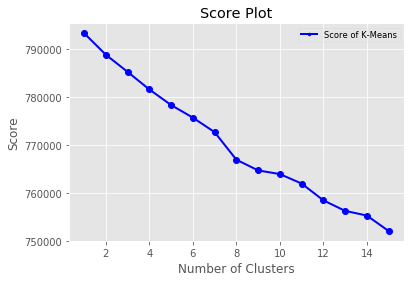

In [17]:
## Plotting the result
plt.plot(cluster, score_r, 'bo-', linewidth=2)
plt.title('Score Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
leg = plt.legend(['Score of K-Means'], loc='best', borderpad=0.3,
                 shadow=False, prop=mpl.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

According to the scree plot, it shows that by the reduced data, the "**elbow**" point is **8**. 
However, to prevent the biasness, in addtition to **right** clusters, 
we also let the machine learn the cases of **seven** clusters and **nine** clusters. The results are shown below.

*7 clusters*

In [19]:
start = trec() 

kmeans7r = KMeans(n_clusters=7, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult7r = kmeans7r.fit(X_reduced)
kmlabels7r = kmresult7r.predict(X_reduced)
words = allWrdMat10_reduced.columns
order_centroids7r = kmresult7r.cluster_centers_.argsort()[:, ::-1]
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 205.053 seconds


In [20]:
kmcluster7 = kmlabels7r; clustersize = []
for i in range(len(np.unique(kmcluster7))):
    clustersize.append(len(kmcluster7[np.array(kmcluster7) == i]))
pd.DataFrame(index = range(len(np.unique(kmcluster7))), columns = ['Cluster Size'], data = clustersize).transpose()

,0,1,2,3,4,5,6
Cluster Size,3452,79258,3595,3255,1871,4480,3240


In [21]:
print("Top 20 terms per cluster: \n")

for a in range(7):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids7r[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult7r.cluster_centers_[a,b])
    comptable7 = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable7 = comptable7.transpose()
    display(comptable7)

Top 20 terms per cluster: 

Cluster 0:


,億,ドル,兆,万,年度,予算,支援,赤字,政府,社,金,分,増,費,融資,．,資金,総額,方針,数
20 highest component,1.069,0.138,0.133,0.093,0.08,0.074,0.071,0.07,0.061,0.059,0.053,0.052,0.052,0.052,0.048,0.046,0.046,0.042,0.04,0.039


Cluster 1:


,政府,調査,日本,案,万,方針,化,自民,会談,大統領,きょう,者,する,合意,協議,検討,改革,会議,中国,委
20 highest component,0.053,0.048,0.041,0.041,0.04,0.039,0.038,0.035,0.034,0.033,0.032,0.032,0.029,0.028,0.028,0.027,0.027,0.026,0.026,0.025


Cluster 2:


,イラク,軍,大統領,政府,国連,攻撃,派遣,クウェート,対,撤退,支援,国籍,自衛隊,沖縄,会談,死亡,湾岸,戦争,ソ連,基地
20 highest component,0.591,0.527,0.109,0.085,0.082,0.063,0.057,0.056,0.055,0.053,0.053,0.052,0.05,0.048,0.045,0.045,0.045,0.044,0.043,0.037


Cluster 3:


,選,自民,参院,衆院,投票,総裁,知事,民主,党,市長,調査,出馬,きょう,大統領,代表,表明,選挙,統一,県,告示
20 highest component,1.059,0.243,0.219,0.175,0.14,0.139,0.133,0.125,0.112,0.101,0.089,0.087,0.078,0.077,0.065,0.058,0.054,0.052,0.049,0.048


Cluster 4:


,容疑,逮捕,者,事件,ら,万,地検,警視庁,殺人,社長,東京,きょう,殺害,県警,収賄,詐欺,捜査,議員,供述,歳
20 highest component,0.742,0.657,0.27,0.19,0.162,0.094,0.084,0.076,0.076,0.071,0.068,0.065,0.065,0.064,0.061,0.061,0.057,0.055,0.052,0.048


Cluster 5:


,連載,地球,寄稿,読む,部,日本,上,世界,中,下,化,経済,危機,政治,する,改革,中国,時代,環境,社会
20 highest component,0.81,0.224,0.194,0.19,0.167,0.117,0.081,0.078,0.076,0.065,0.055,0.055,0.054,0.054,0.051,0.049,0.046,0.04,0.038,0.036


Cluster 6:


,東京,地検,地裁,事件,億,都,ら,万,聴取,捜査,台,起訴,容疑,終値,銭,区,きょう,市場,会議,五輪
20 highest component,1.015,0.189,0.074,0.067,0.065,0.065,0.054,0.054,0.052,0.047,0.043,0.042,0.042,0.039,0.037,0.036,0.035,0.033,0.033,0.033


## We need to rewrite this part. Could you please do it? Or we can talk about it.

I would name clusters as following:

* Cluster 0: **Diplomacy** ("大統領" (president), "会談" (one-to-one meeting of national head), "ロシア" (Russia), "ブッシュ" (Bush), "ソ連" (abbreviation for Soviet), "エリツィン" (Yeltsin), "イラク" (Iraq),  "韓国" (Korea), "クリントン" (Clinton), "首脳" (national heads or leaders), "訪日" (Japan visit of foreign heads) ...) 
* Cluster 0: **General** (Remaining Category)
* Cluster 2: **Election** ("選" (choose. Used in the context of election, e.g., 衆院選 (lower house election), 知事選 (guberatorial election), 総裁選 (party leader election)), "自民" (Liberal Democratic Party), "投票" (vote), "民主" (Democratic party), "市長" (mayor), "出馬" (run in election), "県" (prefecture)

In [154]:
## We need to redo this part but we don't have to do it now. Your thought?

start = trec() 

saveres7 = kmlabels7r

saveres[np.array(saveres)==0] = "Diplomacy"
saveres[np.array(saveres)==1] = "General"
saveres[np.array(saveres)==2] = "Election"

saveres = pd.DataFrame(saveres)
saveres.to_csv('../../data/kmlabels3_reduced.csv')

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.195 seconds


*8 clusters*

In [22]:
start = trec() 

kmeans8r = KMeans(n_clusters=8, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult8r = kmeans8r.fit(X_reduced)
kmlabels8r = kmresult8r.predict(X_reduced)
words = allWrdMat10_reduced.columns

order_centroids8r = kmresult8r.cluster_centers_.argsort()[:, ::-1]
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 176.032 seconds


In [23]:
kmcluster8 = kmlabels8r; clustersize = []
for i in range(len(np.unique(kmcluster8))):
    clustersize.append(len(kmcluster8[np.array(kmcluster8) == i]))
pd.DataFrame(index = range(len(np.unique(kmcluster8))), columns = ['Cluster Size'], data = clustersize).transpose()

,0,1,2,3,4,5,6,7
Cluster Size,3000,74378,2918,3134,3693,3659,3996,4373


In [24]:
print("Top 20 terms per cluster: \n")

for a in range(8):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids8r[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult8r.cluster_centers_[a,b])
    comptable8 = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable8 = comptable8.transpose()
    display(comptable8)

Top 20 terms per cluster: 

Cluster 0:


,大統領,ロシア,ブッシュ,会談,ソ連,エリツィン,イラク,韓国,選,ゴルバチョフ,表明,来日,クリントン,演説,会見,軍,外相,訪日,フセイン,金
20 highest component,1.039,0.142,0.12,0.105,0.105,0.095,0.093,0.086,0.075,0.073,0.072,0.056,0.055,0.05,0.045,0.041,0.04,0.04,0.038,0.037


Cluster 1:


,政府,億,日本,方針,案,東京,化,者,自民,事件,検討,する,改革,法,中国,．,合意,会議,党,委
20 highest component,0.056,0.044,0.042,0.041,0.04,0.04,0.037,0.036,0.033,0.028,0.028,0.028,0.025,0.025,0.024,0.024,0.024,0.023,0.023,0.022


Cluster 2:


,選,自民,参院,衆院,総裁,知事,民主,党,投票,市長,出馬,きょう,代表,表明,調査,選挙,県,統一,告示,候補
20 highest component,1.068,0.263,0.23,0.185,0.155,0.149,0.129,0.12,0.119,0.111,0.094,0.078,0.071,0.062,0.059,0.057,0.054,0.053,0.053,0.047


Cluster 3:


,会談,首脳,外相,合意,中,協議,会議,ソ,韓,北朝鮮,一致,表明,問題,中国,協力,大統領,党首,核,確認,共同
20 highest component,0.788,0.599,0.133,0.119,0.104,0.096,0.088,0.082,0.079,0.074,0.069,0.06,0.057,0.056,0.055,0.053,0.053,0.052,0.051,0.048


Cluster 4:


,万,億,東証,者,台,終値,東京,調査,件,．,容疑,株,千,数,逮捕,銭,省,社,政府,分
20 highest component,1.06,0.1,0.075,0.062,0.06,0.06,0.057,0.053,0.053,0.046,0.046,0.044,0.041,0.04,0.04,0.037,0.035,0.034,0.034,0.034


Cluster 5:


,連載,部,日本,上,中,世界,下,政治,する,経済,危機,化,改革,時代,中国,環境,変わる,社会,再生,地球
20 highest component,1.0,0.204,0.128,0.1,0.087,0.086,0.079,0.06,0.057,0.054,0.054,0.052,0.052,0.046,0.046,0.045,0.043,0.041,0.04,0.04


Cluster 6:


,調査,世論,朝日新聞社,読売新聞社,割,支持,内閣,全国,社,省,率,自民,．,する,会,読売新聞,委,者,本社,日本
20 highest component,1.006,0.311,0.167,0.159,0.15,0.139,0.11,0.102,0.061,0.056,0.05,0.046,0.046,0.042,0.041,0.041,0.041,0.04,0.039,0.038


Cluster 7:


,きょう,問題,協議,案,委,衆院,政府,決定,自民,北朝鮮,予算,会議,東京,ら,開幕,法案,合意,党,核,国会
20 highest component,0.619,0.406,0.071,0.058,0.058,0.056,0.044,0.043,0.043,0.041,0.04,0.038,0.037,0.034,0.034,0.034,0.032,0.031,0.031,0.031


## We need to rewrite this part. Could you please do it? Or we can talk about it.

I would name clusters as following:

* Cluster 0: **General** (Remaining Category)
* Cluster 1: **Crime** ( "地検" (district prosecutor's office), "容疑" (crime charge), "地裁" (district court), "事件" (affair or incident), "逮捕" (arrest), "捜査" (investigation) ...)
* Cluster 2: **Politics** ( "案" (plan. often used in context of government plan, such as 予算案 (budget pllan), 法案 (bill)), "政府" (government), "自民" (Liberal Democratic Party, often the case cabinet party), "改革" (reform) , "衆院" (House of Representatives, lower house in Japan), "与党" (cabinet party)...)
* Cluster 3: **Economy** ( "万" (ten thousand), "億" (billion), "東証" (Tokyo stock market), "終値" (end price, i.e., stock price), "株" (stock), "社" (company), "年金" (pension program)...)

In [153]:
## We need to redo this part but we don't have to do it now. Your thought?

start = trec() 

saveres = kmlabels4r

saveres[np.array(saveres)==0] = "General"
saveres[np.array(saveres)==1] = "Crime"
saveres[np.array(saveres)==2] = "Politics"
saveres[np.array(saveres)==3] = "Economy"

saveres = pd.DataFrame(saveres)
saveres.to_csv('../../data/kmlabels4_reduced.csv')

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.204 seconds


*9 clusters*

In [25]:
start = trec() 

kmeans9r = KMeans(n_clusters=9, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult9r = kmeans9r.fit(X_reduced)
kmlabels9r = kmresult9r.predict(X_reduced)
words = allWrdMat10_reduced.columns

order_centroids9r = kmresult9r.cluster_centers_.argsort()[:, ::-1]

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 188.829 seconds


In [27]:
kmcluster9 = kmlabels9r; clustersize = []
for i in range(len(np.unique(kmcluster9))):
    clustersize.append(len(kmcluster9[np.array(kmcluster9) == i]))
pd.DataFrame(index = range(len(np.unique(kmcluster9))), columns = ['Cluster Size'], data = clustersize).transpose()

,0,1,2,3,4,5,6,7,8
Cluster Size,2967,72922,2913,2558,3654,3550,3935,4221,2431


In [28]:
print("Top 20 terms per cluster: \n")

for a in range(9):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids9r[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult9r.cluster_centers_[a,b])
    comptable9 = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable9 = comptable9.transpose()
    display(comptable9)
    
time = trec() - start

Top 20 terms per cluster: 

Cluster 0:


,大統領,ロシア,ブッシュ,ソ連,会談,エリツィン,イラク,韓国,選,ゴルバチョフ,表明,クリントン,来日,演説,会見,軍,訪日,フセイン,外相,金
20 highest component,1.04,0.144,0.121,0.106,0.102,0.095,0.094,0.087,0.076,0.073,0.072,0.056,0.056,0.051,0.045,0.042,0.04,0.038,0.038,0.037


Cluster 1:


,政府,億,日本,案,方針,東京,化,者,自民,検討,事件,会議,改革,法,合意,中国,．,党,ら,委
20 highest component,0.056,0.045,0.042,0.04,0.04,0.04,0.037,0.035,0.033,0.028,0.028,0.026,0.025,0.025,0.024,0.024,0.024,0.023,0.022,0.022


Cluster 2:


,選,自民,参院,衆院,総裁,知事,民主,党,投票,市長,出馬,きょう,代表,表明,調査,選挙,県,告示,統一,候補
20 highest component,1.068,0.263,0.23,0.184,0.155,0.15,0.129,0.12,0.119,0.111,0.094,0.079,0.071,0.062,0.058,0.057,0.055,0.054,0.054,0.047


Cluster 3:


,会談,首脳,外相,合意,中,協議,ソ,韓,北朝鮮,党首,一致,大統領,きょう,表明,問題,中国,核,協力,確認,朝
20 highest component,0.997,0.477,0.164,0.12,0.116,0.109,0.098,0.088,0.08,0.074,0.073,0.07,0.067,0.064,0.062,0.061,0.054,0.052,0.052,0.048


Cluster 4:


,万,億,東証,者,台,終値,東京,調査,件,．,容疑,株,千,数,逮捕,銭,省,社,政府,分
20 highest component,1.061,0.101,0.076,0.062,0.06,0.06,0.057,0.053,0.053,0.046,0.046,0.044,0.042,0.04,0.04,0.038,0.036,0.035,0.034,0.034


Cluster 5:


,連載,部,日本,上,中,世界,下,政治,経済,危機,化,改革,時代,変わる,中国,社会,再生,環境,地球,世紀
20 highest component,1.0,0.21,0.132,0.102,0.09,0.088,0.081,0.059,0.056,0.054,0.052,0.052,0.047,0.045,0.042,0.042,0.041,0.041,0.04,0.034


Cluster 6:


,調査,世論,朝日新聞社,読売新聞社,割,支持,内閣,全国,社,省,率,．,自民,読売新聞,者,会,委,本社,日本,評価
20 highest component,1.006,0.315,0.17,0.161,0.153,0.142,0.111,0.103,0.061,0.056,0.05,0.047,0.047,0.042,0.04,0.04,0.04,0.04,0.038,0.034


Cluster 7:


,きょう,問題,協議,案,委,衆院,政府,決定,北朝鮮,自民,会議,予算,東京,開幕,ら,法案,核,合意,国会,党
20 highest component,0.616,0.41,0.072,0.06,0.059,0.057,0.045,0.043,0.043,0.042,0.04,0.04,0.037,0.035,0.035,0.034,0.033,0.033,0.031,0.031


Cluster 8:


,する,れる,政府,化,連載,者,方針,日本,報告,中国,案,閉幕,会議,改革,北朝鮮,自民,採択,問題,合意,事件
20 highest component,1.018,0.07,0.055,0.049,0.046,0.044,0.04,0.039,0.037,0.036,0.035,0.033,0.032,0.031,0.031,0.031,0.03,0.03,0.028,0.026


## We need to rewrite this part. Could you please do it? Or we can talk about it.

I would name clusters as following:

* Cluster 0: **General** (Remaining Category)
* Cluster 1: **Crime** ( "地検" (district prosecutor's office), "容疑" (crime charge), "地裁" (district court), "事件" (affair or incident), "逮捕" (arrest), "捜査" (investigation) "きょう" (today) ...)
* Cluster 2: **Politics** ( "案" (plan. often used in context of government plan, such as 予算案 (budget pllan), 法案 (bill)), "政府" (government), "自民" (Liberal Democratic Party, often the case cabinet party), "改革" (reform) ,"衆院" (House of Representatives, lower house in Japan), "与党" (cabinet party)...)
* Cluster 3: **Economy** ( "万" (ten thousand), "億" (billion), "東証" (Tokyo stock market), "終値" (end price, i.e., stock price), "株" (stock), "社" (company), "年金" (pension program)...)
* Cluster 4: **Diplomacy** ("会談" & "会議" (both mean conference. former implies one-to-one meeting of national head, and latter implies large conference with multiple members), "首脳" (national heads or leaders), "外相" (foreign ministers), "大統領" (president), "合意" (agreement), "中" (abbreviation for 中国 China), "ソ" & "ソ連" (abbreviation for Soviet), "韓" (abbreviation for 韓国 Korea), 協力 (cooperation), "核" (nuclear) ...) 

In [152]:
## We need to redo this part but we don't have to do it now. Your thought?

start = trec() 

saveres = kmlabels5r

saveres[np.array(saveres)==0] = "General"
saveres[np.array(saveres)==1] = "Crime"
saveres[np.array(saveres)==2] = "Politics"
saveres[np.array(saveres)==3] = "Economy"
saveres[np.array(saveres)==4] = "Diplomacy"

saveres = pd.DataFrame(saveres)
saveres.to_csv('../../data/kmlabels5_reduced.csv')

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.211 seconds


## 3. Hierarchical Clustering to Explore Word Appearance Patterns

### 3.1 Prepare Functions and Data

In [29]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
from matplotlib.font_manager import FontProperties
from sklearn.cluster import AgglomerativeClustering as hicluster

%matplotlib inline

In [30]:
dict_index = {t:i for i,t in enumerate(allWrdMat10.columns)}

dictlist = []
temp = []
akey = []
avalue = []

for key, value in dict_index.items():
    akey.append(key)
    avalue.append(value)
    temp = [key,value]
    dictlist.append(temp)

### 3.2 Application to First 1000 words

In [31]:
avalue = np.array(avalue)

X_transform = X[:, avalue < 1000].transpose().toarray()

freq1000terms = akey
freq1000terms = np.array(freq1000terms)[avalue < 1000]

In [32]:
start = trec() 
hicl_ward = hicluster(n_clusters=40,linkage='ward', compute_full_tree = False)
hicl_comp = hicluster(n_clusters=40,linkage='complete', compute_full_tree = False)
hicl_avg = hicluster(n_clusters=40,linkage='average', compute_full_tree = False)

hiclwres = hicl_ward.fit(X_transform)
hiclcres = hicl_comp.fit(X_transform)
hiclares = hicl_avg.fit(X_transform)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 167.839 seconds


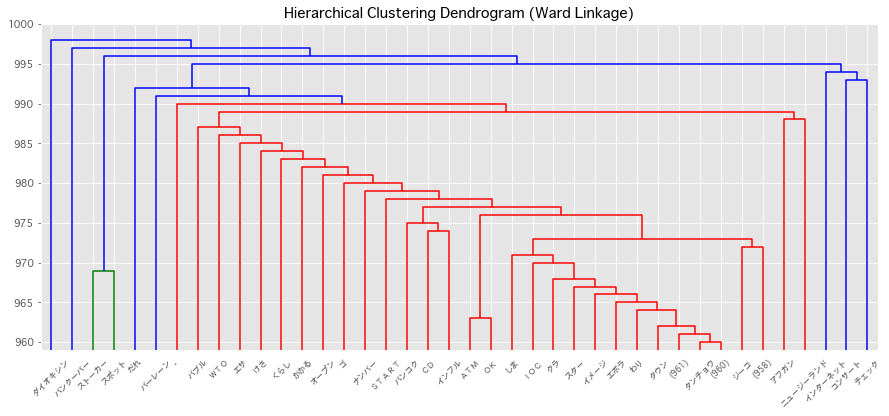

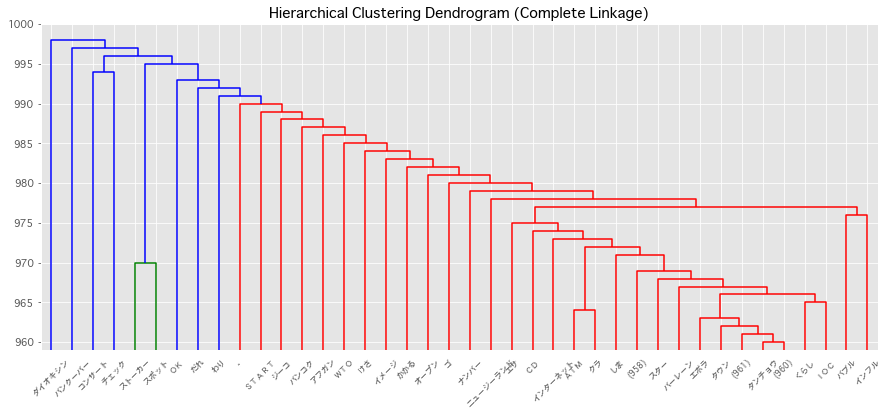

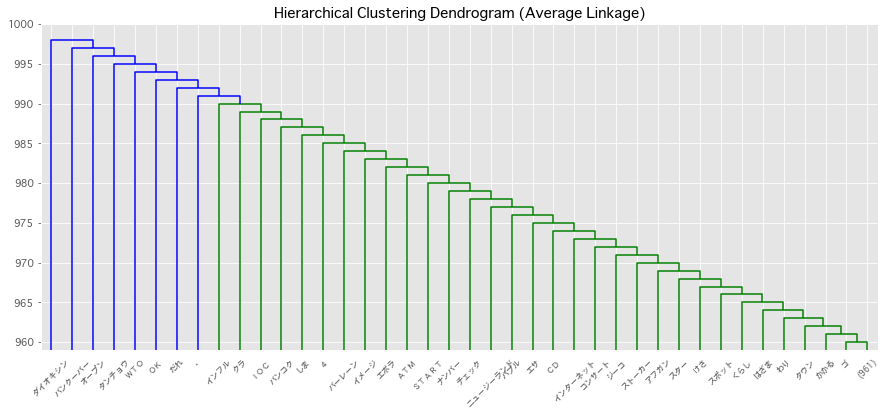

In [33]:
plt.rcParams["font.family"] ="Osaka"
plt.rcParams["figure.figsize"] = (15,6)

model1 = hiclwres
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plot_dendrogram(model1, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model1.labels_], color_threshold = 991)
plt.ylim(959,1000)
plt.show()

model2 = hiclcres
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plot_dendrogram(model2, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model2.labels_], color_threshold = 991)
plt.ylim(959,1000)
plt.show()

model3 = hiclares
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.subplot()
plot_dendrogram(model3, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model3.labels_], color_threshold = 991)
plt.ylim(959,1000)
plt.show()

### 3.3 Application to Full Dataset

In [27]:
start = trec()

X_test = X.transpose().toarray()
X_testsp = sp.csr_matrix(X_test)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 21.371 seconds


In [28]:
start = trec() 

hicl_compt = hicluster(n_clusters=40, linkage='complete', affinity='l1', compute_full_tree = False)

hiclwres_test = hicl_compt.fit(X_test)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 22926.007 seconds


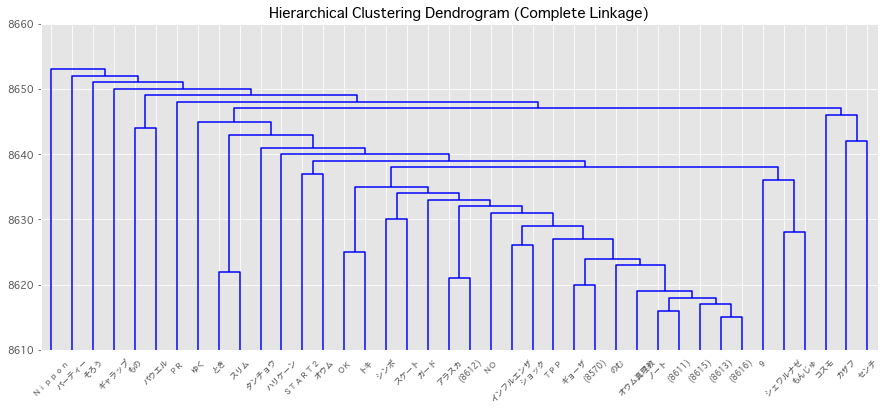

In [41]:
plt.rcParams["font.family"] ="Osaka"
plt.rcParams["figure.figsize"] = (15,6)

model4 = hiclwres_test
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plot_dendrogram(model4, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model4.labels_], color_threshold = 991)
plt.ylim(8610,8660)
plt.show()

### 3.4 Application to Reduced Words Dataset

In [34]:
X_transform_r = X_reduced.transpose().toarray()

freqterms_r = akey
freqterms_r = np.array(freqterms_r)[condition]

In [35]:
start = trec() 
hicl_ward = hicluster(n_clusters=40,linkage='ward', compute_full_tree = False)
hicl_comp = hicluster(n_clusters=40,linkage='complete', compute_full_tree = False)
hicl_avg = hicluster(n_clusters=40,linkage='average', compute_full_tree = False)

hiclwres = hicl_ward.fit(X_transform_r)
hiclcres = hicl_comp.fit(X_transform_r)
hiclares = hicl_avg.fit(X_transform_r)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 1676.384 seconds


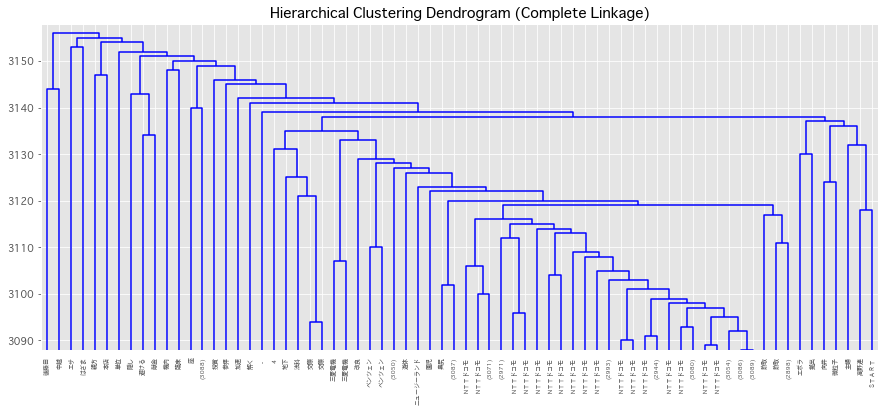

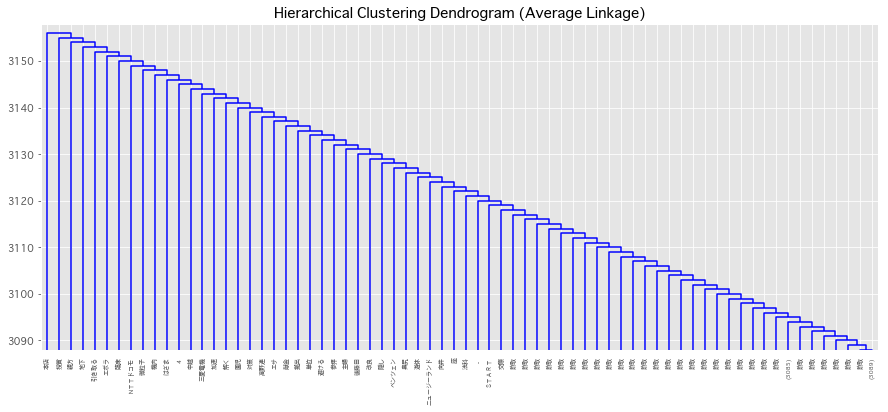

In [40]:
#print([f.name for f in mpl.font_manager.fontManager.ttflist])
plt.rcParams["font.family"] ="Osaka" # Mac 
#plt.rcParams["font.family"] ="HGSeikaishotaiPRO" # Windows
plt.rcParams["figure.figsize"] = (15,6)

#model1 = hiclwres
#plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
#plot_dendrogram(model1, p = 70, truncate_mode = 'lastp', orientation = 'top', labels=freqterms_r[model1.labels_], color_threshold = 991)
#plt.ylim(3088,3158)
#plt.show()

model2 = hiclcres
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plot_dendrogram(model2, p = 70, truncate_mode = 'lastp', orientation = 'top', labels=freqterms_r[model2.labels_], color_threshold = 991)
plt.ylim(3088,3158)
plt.show()

model3 = hiclares
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.subplot()
plot_dendrogram(model3, p = 70, truncate_mode = 'lastp', orientation = 'top', labels=freqterms_r[model3.labels_], color_threshold = 991)
plt.ylim(3088,3158)
plt.show()

## I don't know why my dendrogram does not work for "ward" linkage

## Conclusion

It looks like at least for this data, **k-means** performs much better than **hierarchical clustering**. What we mean better is that clusters searched by **k-means** makes more sense than hierarchical clustering, and the more influential dimesntions of the training set makes more sense too.